In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('monokai')

In [36]:
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import StandardScaler
import os

from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import Compose, ToTensor,Resize,ColorJitter,CenterCrop,Grayscale
import torchvision.models as models

from torch.utils.data import DataLoader, TensorDataset, random_split, Dataset

In [37]:
def read_data(file):
    with open(file, 'r') as f:
        data = f.read()
    bs_data = bs(data, 'xml') 
    return bs_data

def calc(b_name, i):
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    x = np.asarray([float(x) for x in a1.split(',')])
    y = np.asarray([float(y) for y in b1.split(',')])
    z = np.asarray([float(z) for z in c1.split(',')])
    r = (x**2 + y**2 + z**2)**0.5
    return r

def values_df(bs_data, low, high):
    b_name = bs_data.find_all('name')
    
    Attributes = []
    for i in range(len(b_name)):
        Attributes.append(b_name[i].get('value'))
    
    Attributes = list(set(Attributes))
    
    Collection = {}
    for i in range(low, high):
        r = calc(b_name, i)
        v = b_name[i].get('value')
        Collection[v] = r
    
    df = pd.DataFrame(Collection)
    return df

def get_differences_values_healthy(attribute, low, high):
    diff_list = []
    for i in range(len(os.listdir("../USE THIS/Healthy"))):
        if os.listdir("../USE THIS/Healthy")[i].startswith("timeseries"):
            try:
                bs_data = read_data(os.listdir("../USE THIS/Healthy")[i])
                
                
                df1 = values_df(bs_data, 0, int(len(b_name)/4))
                df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
                df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
                df1 = df_max.subtract(df_min, fill_value=0)

                #df1 = df1.rename(index={100:i})
                #df_list.append(df1)

                
                
                #df = values_df(bs_data,low,high)
                #k = df.mean()[attribute]
                diff_list.append(df1)
            except:
                print(os.listdir("../USE THIS/Healthy")[i] + " failed to compute")
        else:
            continue
        
    return diff_list


def get_differences_values_pfps(attribute, low, high):
    diff_list = []
    for i in range(len(os.listdir("../USE THIS/PFPS"))):
        if os.listdir("../USE THIS/PFPS")[i].startswith("timeseries"):
            try:
                bs_data = read_data(os.listdir("../USE THIS/PFPS")[i])
                #df = values_df(bs_data,low,high)
                #k = df.mean()[attribute]
                df1 = values_df(bs_data, 0, int(len(b_name)/4))
                df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
                df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
                df1 = df_max.subtract(df_min, fill_value=0)

                diff_list.append(df1)

            except:
                print(os.listdir("../USE THIS/PFPS")[i] + " failed to compute")
        else:
            continue
        
    return diff_list





In [38]:
os.listdir("USE THIS/PFPS")[0]

'timeseries-11.xml'

In [39]:
path = "USE THIS/PFPS/"
xml_file = 'timeseries-11.xml'
bs_data = read_data(path+xml_file)
b_name = bs_data.find_all('name')

Attributes = []
for i in range(len(b_name)):
    Attributes.append(b_name[i].get('value'))

Attributes = list(set(Attributes))

In [40]:
#1
i = 0
df_list_level1 = []
injurylevel = [0 for i in range(21)]
path = "USE THIS/Healthy/"


for xml_file in os.listdir(path):
    if xml_file.startswith ("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        
        try:
            df1 = values_df(bs_data, 0, int(len(b_name)/4))
            df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
            df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
            df1 = df_max.subtract(df_min, fill_value=0)
            df1 = df1.rename(index={100:i})
            
            df_list_level1.append(df1)
            i+=1
        except:
            print(xml_file + "failed to compute")

data_level1 = pd.concat(df_list_level1)
data_level1['Injury level'] = injurylevel


print(f"Length of how many timeseries-files of healthy people we have for level 1: {i}")

#2
i = 0
df_list_level2 = []
injurylevel = [0 for i in range(22)]
path = "USE THIS/Healthy/"


for xml_file in os.listdir(path):
    if xml_file.startswith ("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        
        try:
            df1 = values_df(bs_data, int(len(b_name)/4), int(len(b_name)/2))
            df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
            df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
            df1 = df_max.subtract(df_min, fill_value=0)
            df1 = df1.rename(index={100:i})
            
            df_list_level2.append(df1)
            i+=1
        except:
            print(xml_file + "failed to compute")

data_level2 = pd.concat(df_list_level2)
data_level2['Injury level'] = injurylevel

print(f"Length of how many timeseries-files of healthy people we have for level 2: {i}")

#3
i = 0
df_list_level3 = []
injurylevel = [0 for i in range(22)]
path = "USE THIS/Healthy/"


for xml_file in os.listdir(path):
    if xml_file.startswith ("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        
        try:
            df1 = values_df(bs_data, int(len(b_name)/2), int(3*len(b_name)/4))
            df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
            df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
            df1 = df_max.subtract(df_min, fill_value=0)
            df1 = df1.rename(index={100:i})
            
            df_list_level3.append(df1)
            i+=1
        except:
            print(xml_file + "failed to compute")

data_level3 = pd.concat(df_list_level3)
data_level3['Injury level'] = injurylevel

print(f"Length of how many timeseries-files of healthy people we have for level 3: {i}")

#4
i = 0
df_list_level4 = []
injurylevel = [0 for i in range(21)]
path = "USE THIS/Healthy/"


for xml_file in os.listdir(path):
    if xml_file.startswith ("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        
        try:
            df1 = values_df(bs_data, int(3*len(b_name)/4), int(len(b_name)))
            df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
            df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
            df1 = df_max.subtract(df_min, fill_value=0)
            df1 = df1.rename(index={100:i})
            
            df_list_level4.append(df1)
            i+=1
        except:
            print(xml_file + "failed to compute")

data_level4 = pd.concat(df_list_level4)
data_level4['Injury level'] = injurylevel

print(f"Length of how many timeseries-files of healthy people we have for level 4: {i}")



timeseries-10.xmlfailed to compute
timeseries-44.xmlfailed to compute
Length of how many timeseries-files of healthy people we have for level 1: 21
timeseries-10.xmlfailed to compute
Length of how many timeseries-files of healthy people we have for level 2: 22
timeseries-10.xmlfailed to compute
Length of how many timeseries-files of healthy people we have for level 3: 22
timeseries-10.xmlfailed to compute
timeseries-23.xmlfailed to compute
Length of how many timeseries-files of healthy people we have for level 4: 21


In [41]:
data_combined = pd.concat([data_level1, data_level2, data_level3, data_level4])

In [42]:
#1
df_list2_level1 = []
injurylevel2 = [1 for i in range(20)]
path = "USE THIS/PFPS/"

i = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = values_df(bs_data, 0, int(len(b_name)/4))
            df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
            df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
            df1 = df_max.subtract(df_min, fill_value=0)
            df1 = df1.rename(index={100:i})
            df_list2_level1.append(df1)
            i+=1
            
        except:
            print(xml_file + "failed to compute")
            
data2_level1 = pd.concat(df_list2_level1)
data2_level1['Injury level'] = injurylevel2

print(f"Length of how many timeseries-files of PFPS people we have for level 1: {i}")

#2
df_list2_level2 = []
injurylevel2 = [1 for i in range(20)]
path = "USE THIS/PFPS/"

i = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = values_df(bs_data, int(len(b_name)/4), int(len(b_name)/2))
            df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
            df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
            df1 = df_max.subtract(df_min, fill_value=0)
            df1 = df1.rename(index={100:i})
            df_list2_level2.append(df1)
            i+=1
            
        except:
            print(xml_file + "failed to compute")
            
data2_level2 = pd.concat(df_list2_level2)
data2_level2['Injury level'] = injurylevel2

print(f"Length of how many timeseries-files of PFPS people we have for level 2: {i}")

#3
df_list2_level3 = []
injurylevel2 = [1 for i in range(20)]
path = "USE THIS/PFPS/"

i = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = values_df(bs_data, int(len(b_name)/4), int(len(b_name)/2))
            df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
            df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
            df1 = df_max.subtract(df_min, fill_value=0)
            df1 = df1.rename(index={100:i})
            df_list2_level3.append(df1)
            i+=1
            
        except:
            print(xml_file + "failed to compute")
            
data2_level3 = pd.concat(df_list2_level3)
data2_level3['Injury level'] = injurylevel2

print(f"Length of how many timeseries-files of PFPS people we have for level 3: {i}")

#4

df_list2_level4 = []
injurylevel2 = [1 for i in range(20)]
path = "USE THIS/PFPS/"

i = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = values_df(bs_data, int(len(b_name)/4), int(len(b_name)/2))
            df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
            df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
            df1 = df_max.subtract(df_min, fill_value=0)
            df1 = df1.rename(index={100:i})
            df_list2_level4.append(df1)
            i+=1
            
        except:
            print(xml_file + "failed to compute")
            
data2_level4 = pd.concat(df_list2_level4)
data2_level4['Injury level'] = injurylevel2

print(f"Length of how many timeseries-files of PFPS people we have for level 4: {i}")

Length of how many timeseries-files of PFPS people we have for level 1: 20
Length of how many timeseries-files of PFPS people we have for level 2: 20
Length of how many timeseries-files of PFPS people we have for level 3: 20
Length of how many timeseries-files of PFPS people we have for level 4: 20


In [43]:
data2_combined = pd.concat([data2_level1, data2_level2, data2_level3, data2_level4])

Traditional ML classifiers

In [44]:
# injured = 1, uninjured = 0


In [45]:
data3_level1 = pd.concat([data_level1, data2_level1]).reset_index(drop = True)
data3_level2 = pd.concat([data_level2, data2_level2]).reset_index(drop = True)
data3_level3 = pd.concat([data_level3, data2_level3]).reset_index(drop = True)
data3_level4 = pd.concat([data_level4, data2_level4]).reset_index(drop = True)

In [46]:
data3_combined = pd.concat([data_combined, data2_combined])


In [47]:
y = data3_combined['Injury level']
y = pd.DataFrame(y, columns = ['Injury level'])
X = data3_combined.drop(['Injury level'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)



In [48]:
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

sc = StandardScaler()
X_train = sc.fit_transform(imputed_X_train)
X_test = sc.transform(imputed_X_test)

In [49]:


#Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score1 = accuracy_score(y_test, y_pred)
print(score1)

[[13  5]
 [ 2 14]]
0.7941176470588235


In [50]:
#Random Forest
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score2 = accuracy_score(y_test, y_pred)
print(score2)

[[17  1]
 [ 1 15]]
0.9411764705882353


In [51]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# plt.rc('font', **font)

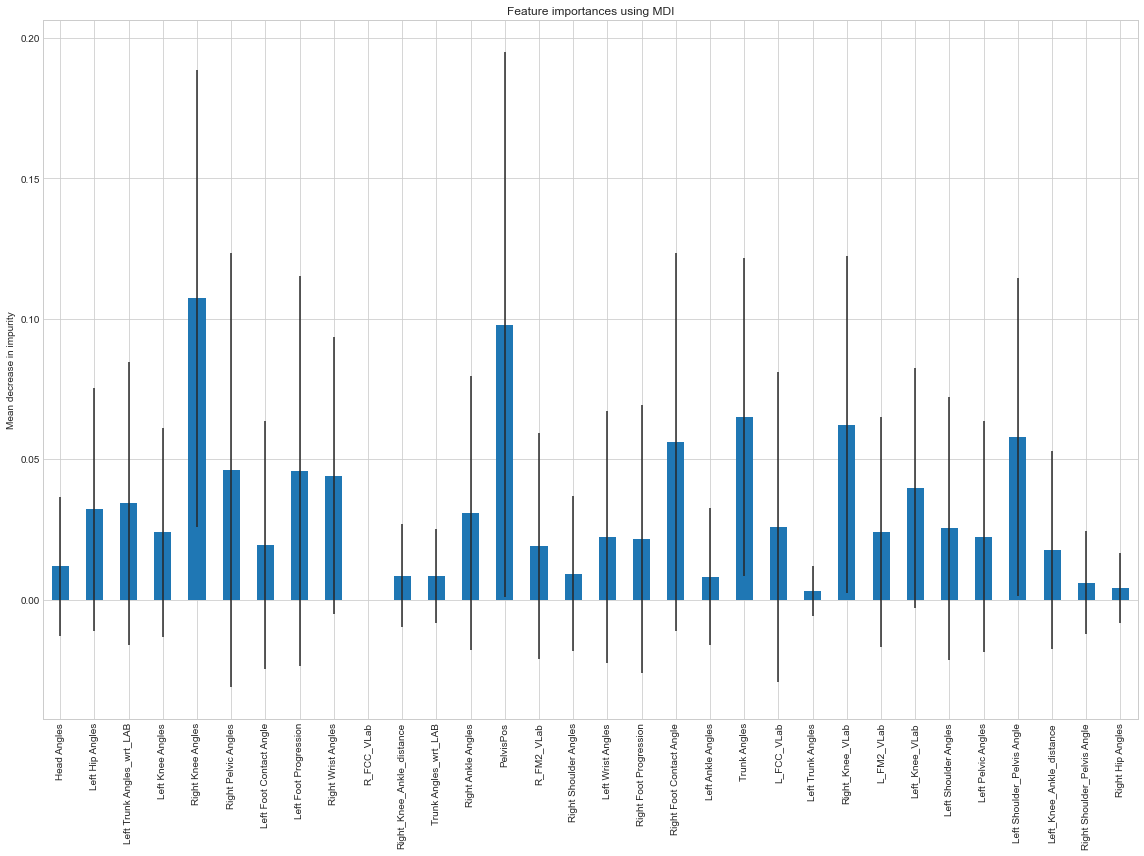

In [52]:
importances = classifier2.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier2.estimators_], axis=0)

forest_importances = pd.Series(importances, index=Attributes)

fig, ax = plt.subplots(figsize = (16,12))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


Text(0.5, 1.0, 'Random Forest feature importance')

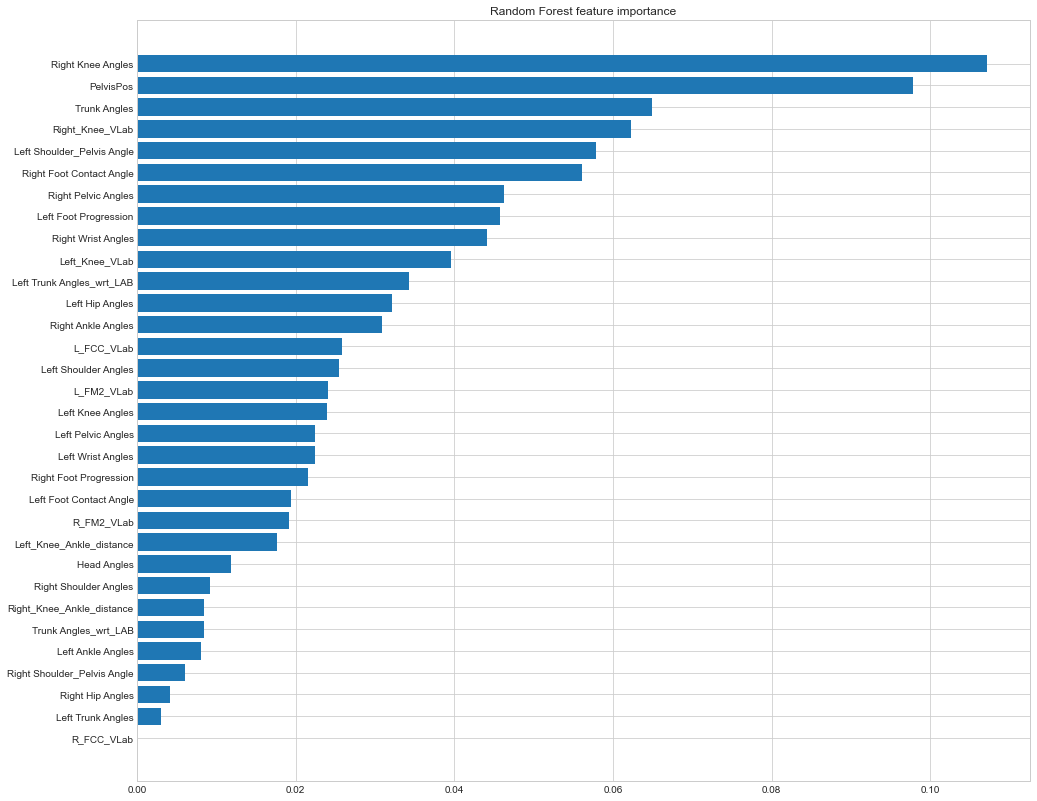

In [53]:
sorted_idx = classifier2.feature_importances_.argsort()

plt.figure(figsize = (16,14))
plt.barh(np.asarray(Attributes)[sorted_idx], classifier2.feature_importances_[sorted_idx])
plt.title('Random Forest feature importance')

In [54]:
#Naive Bayes
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)
y_pred = classifier3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score3 = accuracy_score(y_test, y_pred)
print(score3)

[[ 6 12]
 [ 1 15]]
0.6176470588235294


In [55]:
#KNC
classifier4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier4.fit(X_train, y_train)
y_pred = classifier4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score4 = accuracy_score(y_test, y_pred)
print(score4)

[[ 9  9]
 [ 5 11]]
0.5882352941176471


In [56]:
#SVC
classifier5 = SVC(kernel = 'linear', random_state = 0)
classifier5.fit(X_train, y_train)
y_pred = classifier5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score5 = accuracy_score(y_test, y_pred)
print(score5)

[[12  6]
 [ 1 15]]
0.7941176470588235


In [57]:
#XGB
classifier6 = XGBClassifier(use_label_encoder = False)
classifier6.fit(X_train, y_train)
y_pred = classifier6.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score6 = accuracy_score(y_test, y_pred)
print(score6)

[16:45:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[15  3]
 [ 2 14]]
0.8529411764705882


Text(0.5, 1.0, 'XBG feature importance')

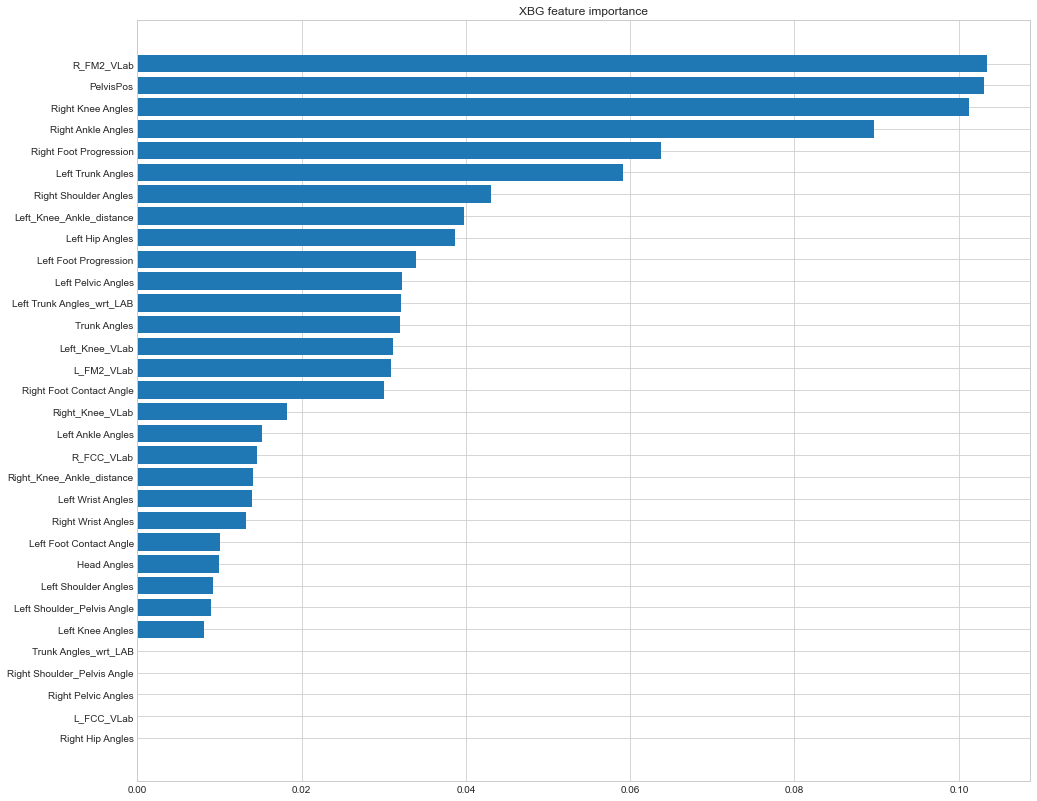

In [58]:
sorted_idx = classifier6.feature_importances_.argsort()

plt.figure(figsize = (16,14))
plt.barh(np.asarray(Attributes)[sorted_idx], classifier6.feature_importances_[sorted_idx])
plt.title('XBG feature importance')

In [59]:
def get_accuracy(algorithm, data, test_size):
    if algorithm == KNeighborsClassifier:
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    elif algorithm == RandomForestClassifier:
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
    else:
        classifier = algorithm()
    y = data['Injury level']
    y = pd.DataFrame(y, columns = ['Injury level'])
    X = data.drop(['Injury level'], axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    my_imputer = SimpleImputer()
    imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
    imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

    imputed_X_train.columns = X_train.columns
    imputed_X_test.columns = X_test.columns

    sc = StandardScaler()
    X_train = sc.fit_transform(imputed_X_train)
    X_test = sc.transform(imputed_X_test)
    
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

        
    
    

In [60]:
rf1 = get_accuracy(RandomForestClassifier, data3_level1, 0.25)
rf2 = get_accuracy(RandomForestClassifier, data3_level2, 0.25)
rf3 = get_accuracy(RandomForestClassifier, data3_level3, 0.25)
rf4 = get_accuracy(RandomForestClassifier, data3_level4, 0.25)
rf5 = get_accuracy(RandomForestClassifier, data3_combined, 0.25)

knc1 = get_accuracy(KNeighborsClassifier, data3_level1, 0.25)
knc2 = get_accuracy(KNeighborsClassifier, data3_level2, 0.25)
knc3 = get_accuracy(KNeighborsClassifier, data3_level3, 0.25)
knc4 = get_accuracy(KNeighborsClassifier, data3_level4, 0.25)
knc5 = get_accuracy(KNeighborsClassifier, data3_combined, 0.25)

x1 = get_accuracy(XGBClassifier, data3_level1, 0.25)
x2 = get_accuracy(XGBClassifier, data3_level2, 0.25)
x3 = get_accuracy(XGBClassifier, data3_level3, 0.25)
x4 = get_accuracy(XGBClassifier, data3_level4, 0.25)
x5 = get_accuracy(XGBClassifier, data3_combined, 0.25)

s1 = get_accuracy(SVC, data3_level1, 0.25)
s2 = get_accuracy(SVC, data3_level2, 0.25)
s3 = get_accuracy(SVC, data3_level3, 0.25)
s4 = get_accuracy(SVC, data3_level4, 0.25)
s5 = get_accuracy(SVC, data3_combined, 0.25)

[16:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

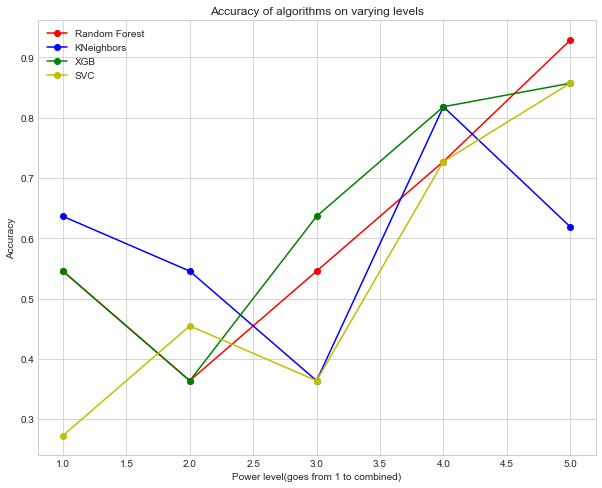

In [61]:
plt.figure(figsize = (10,8))
plt.plot([1,2,3,4,5], [rf1,rf2,rf3,rf4,rf5], 'ro-', label = "Random Forest")
plt.plot([1,2,3,4,5], [knc1,knc2,knc3,knc4,knc5], 'bo-', label = "KNeighbors")
plt.plot([1,2,3,4,5], [x1,x2,x3,x4,x5], 'go-', label = "XGB")
plt.plot([1,2,3,4,5], [s1,s2,s3,s4,s5], 'yo-', label = "SVC")
plt.title("Accuracy of algorithms on varying levels")
plt.xlabel("Power level(goes from 1 to combined)")
plt.ylabel("Accuracy")
plt.legend()


Neural Network using pytorch

In [62]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features = 32, out_features = 16)
        self.fc2 = nn.Linear(in_features = 16, out_features = 8)
        self.out = nn.Linear(in_features = 8, out_features = 1)
        
    def forward(self, t):
        t = t
        
        t = self.fc1(t)
        t = F.relu(t)
        
        t = self.fc2(t)
        t = F.relu(t)
        
        t = self.out(t)
        
        return t
    #returns probability of a person having PFPS

In [63]:
#Creating custom datasets

class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train.values))

class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))


In [64]:
train_loader = DataLoader(dataset = train_data, batch_size = 1)
test_loader = DataLoader(dataset = test_data, batch_size = 1)

In [65]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    
    if y_pred_tag == y_test:
        return True
    else:
        return False
    

In [66]:
# def train_model(model, device, loss_fn, epochs, optimizer, train_loader):
#     model.train()
#     for i in range(1, epochs+1):
#         epoch_loss = 0
#         epoch_correct = 0
        
#         for X_batch, y_batch in train_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             optimizer.zero_grad()
#             y_pred = model(X_batch)
#             loss = loss_fn(y_pred, y_batch)
#             if binary_acc(y_pred, y_batch):
#                 epoch_correct+=1
#             loss.backward()
#             optimizer.step()
#             epoch_loss+=loss.item()
            
#         print(f'Epoch {i}: | Loss: {epoch_loss:.5f} | 
#               Correct: {epoch_correct} | Acc: {epoch_correct/len(train_loader):.3f}')
              



In [67]:
#Training the model
model = Network()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 10
model.train()
for i in range(1, epochs+1):
    epoch_loss = 0
    epoch_correct = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        if binary_acc(y_pred, y_batch):
            epoch_correct+=1
        loss.backward()
        optimizer.step()
        epoch_loss+=loss.item()
    
    print(f'Epoch {i}: | Loss: {epoch_loss:.5f} | Correct: {epoch_correct} | Acc: {epoch_correct/len(train_loader):.3f}')

Epoch 1: | Loss: 88.00696 | Correct: 76 | Acc: 0.576
Epoch 2: | Loss: 68.30246 | Correct: 99 | Acc: 0.750
Epoch 3: | Loss: 40.13100 | Correct: 113 | Acc: 0.856
Epoch 4: | Loss: 19.71140 | Correct: 125 | Acc: 0.947
Epoch 5: | Loss: 8.08644 | Correct: 129 | Acc: 0.977
Epoch 6: | Loss: 10.01424 | Correct: 128 | Acc: 0.970
Epoch 7: | Loss: 2.45546 | Correct: 132 | Acc: 1.000
Epoch 8: | Loss: 23.04767 | Correct: 129 | Acc: 0.977
Epoch 9: | Loss: 10.62085 | Correct: 129 | Acc: 0.977
Epoch 10: | Loss: 10.85189 | Correct: 129 | Acc: 0.977


In [68]:
#Testing the model

y_pred_list = []
model.eval()

with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())
        
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

[[13  5]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.75      0.94      0.83        16

    accuracy                           0.82        34
   macro avg       0.84      0.83      0.82        34
weighted avg       0.84      0.82      0.82        34



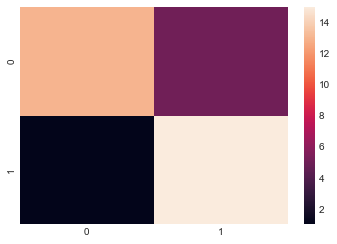

In [69]:
cm = confusion_matrix(y_test, y_pred_list)
print(cm)
sns.heatmap(cm)
print(classification_report(y_test, y_pred_list))